This notebook follows 08_recreate_figure_5.

Inputs:
1. cell_metadata.csv was output from 03-make-cell-metadata
2. differential_expression.csv was output from 05-clean-data-from-retina_1
2. differential_cell_metadata.csv was output from 05-clean-data-from-retina_1
3. differential_gene_metadata.csv was output from 05-clean-data-from-retina_1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import altair
from altair_saver import save as save_altair

In [2]:
to_save=True

# Get Data

In [3]:
expression = pd.read_csv('data/retina/differential_clusters_expression.csv', index_col=0)

cell_metadata = pd.read_csv('data/downloads/retina_clusteridentities.txt',
                            sep='\t', header=None, names=['cell', 'cluster_n'], index_col=0)
cell_metadata['cluster_id'] = cell_metadata['cluster_n'].apply(lambda x: f'cluster_{str(x).zfill(2)}')
cluster_names = cell_metadata['cluster_id']
cluster_names.head()

cell
r1_GGCCGCAGTCCG    cluster_02
r1_CTTGTGCGGGAA    cluster_02
r1_GCGCAACTGCTC    cluster_02
r1_GATTGGGAGGCA    cluster_02
r1_GTGCCGCCTCTC    cluster_25
Name: cluster_id, dtype: object

# Figure 5a

In [4]:
figure5a_genes = ['Nrxn2', 'Atp1b1', 'Pax6', 'Slc32a1', 'Slc6a1', 'Elavl3']
figure5a_genes_upper = [gene.upper() for gene in figure5a_genes]
figure5a_genes_upper

['NRXN2', 'ATP1B1', 'PAX6', 'SLC32A1', 'SLC6A1', 'ELAVL3']

In [5]:
figure5a_expression = expression.loc[:, figure5a_genes_upper]
figure5a_expression = expression[figure5a_genes_upper]
print(figure5a_expression.shape)
figure5a_expression.head()

(6020, 6)


,NRXN2,ATP1B1,PAX6,SLC32A1,SLC6A1,ELAVL3
r1_GGCCGCAGTCCG,16.0,149.0,8.0,0.0,1.0,13.0
r1_CTTGTGCGGGAA,16.0,182.0,21.0,0.0,10.0,5.0
r1_GCGCAACTGCTC,7.0,119.0,10.0,0.0,5.0,4.0
r1_GATTGGGAGGCA,12.0,93.0,7.0,0.0,3.0,7.0
r1_GTGCCGCCTCTC,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
figure5a_expression_mean = figure5a_expression.groupby(cluster_names, axis=0).mean()
print(figure5a_expression_mean.shape)
figure5a_expression_mean.head()

(39, 6)


,NRXN2,ATP1B1,PAX6,SLC32A1,SLC6A1,ELAVL3
cluster_id,,,,,,
cluster_01,2.037037,15.555556,2.074074,1.296296,0.000000,1.629630
cluster_02,2.385714,27.457143,1.785714,0.000000,0.757143,1.885714
cluster_03,1.409091,10.772727,1.454545,1.568182,2.090909,1.477273
cluster_04,1.846154,2.230769,5.692308,0.615385,1.000000,0.846154
cluster_05,3.222222,10.111111,4.888889,1.944444,3.944444,1.888889


In [7]:
figure5a_expression_tidy = figure5a_expression_mean.unstack().reset_index()
figure5a_expression_tidy = figure5a_expression_tidy.rename(
    columns={'level_0': 'gene_symbol', 'level_1': 'barcode', 0: 'expression'})
figure5a_expression_tidy['log_expression'] = np.log2(figure5a_expression_tidy['expression'] + 1)
print(figure5a_expression_tidy.shape)
# figure5a_expression_tidy = figure5a_expression_tidy.join(cluster_names, on='barcode')
figure5a_expression_tidy.head()

(234, 4)


,gene_symbol,cluster_id,expression,log_expression
0,NRXN2,cluster_01,2.037037,1.602665
1,NRXN2,cluster_02,2.385714,1.759460
2,NRXN2,cluster_03,1.409091,1.268489
3,NRXN2,cluster_04,1.846154,1.509014
4,NRXN2,cluster_05,3.222222,2.078003


In [8]:
figure5a_expression_tidy = figure5a_expression_tidy[
    figure5a_expression_tidy['cluster_id'].isin(['cluster_{}'.format(str(x).zfill(2)) for x in range(3, 24)])
]

In [9]:
chart = altair.Chart(figure5a_expression_tidy).mark_circle().encode(
    size='expression', x=altair.X('gene_symbol'), y=altair.Y('cluster_id'))

if to_save:
    # for some reason this doesn't work  (TypeError: Cannot read property 'getContext' of null)
    # just save manually for now
    save_altair(chart, "figures/dot_plot/fig_5a-expression.png")
    
chart

TypeError: Cannot read property 'getContext' of null
    at resize (/home/harrisonized/anaconda3/envs/py36/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3377:26)
    at CanvasRenderer.prototype$6.resize (/home/harrisonized/anaconda3/envs/py36/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3427:5)
    at CanvasRenderer.prototype$4.initialize (/home/harrisonized/anaconda3/envs/py36/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:2989:17)
    at CanvasRenderer.prototype$6.initialize (/home/harrisonized/anaconda3/envs/py36/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3422:28)
    at initializeRenderer (/home/harrisonized/anaconda3/envs/py36/lib/vega-cli/node_modules/vega-view/build/vega-view.js:630:8)
    at renderHeadless (/home/harrisonized/anaconda3/envs/py36/lib/vega-cli/node_modules/vega-view/build/vega-view.js:736:12)
    at processTicksAndRejections (internal/process/task_queues.js:93:5)
    at async V

alt.Chart(...)

In [10]:
chart = altair.Chart(figure5a_expression_tidy).mark_circle().encode(
    size='log_expression', x=altair.X('gene_symbol'), y=altair.Y('cluster_id'))

if to_save:
    # for some reason this doesn't work (TypeError: Cannot read property 'getContext' of null)
    # just save manually for now
    save_altair(chart, "figures/dot_plot/fig_5a-log_expression.png")
    
chart

TypeError: Cannot read property 'getContext' of null
    at resize (/home/harrisonized/anaconda3/envs/py36/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3377:26)
    at CanvasRenderer.prototype$6.resize (/home/harrisonized/anaconda3/envs/py36/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3427:5)
    at CanvasRenderer.prototype$4.initialize (/home/harrisonized/anaconda3/envs/py36/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:2989:17)
    at CanvasRenderer.prototype$6.initialize (/home/harrisonized/anaconda3/envs/py36/lib/vega-cli/node_modules/vega-scenegraph/build/vega-scenegraph.js:3422:28)
    at initializeRenderer (/home/harrisonized/anaconda3/envs/py36/lib/vega-cli/node_modules/vega-view/build/vega-view.js:630:8)
    at renderHeadless (/home/harrisonized/anaconda3/envs/py36/lib/vega-cli/node_modules/vega-view/build/vega-view.js:736:12)
    at processTicksAndRejections (internal/process/task_queues.js:93:5)
    at async V

alt.Chart(...)

# Figure 5b

In [11]:
figure5b_genes = ['Chat', "Gad1", 'Gad2', 'Slc17a8', 'Slc6a9', 'Gjd2', 'Gjd2', 'Ebf3']
figure5b_genes_upper = [gene.upper() for gene in figure5b_genes]
figure5b_genes_upper

['CHAT', 'GAD1', 'GAD2', 'SLC17A8', 'SLC6A9', 'GJD2', 'GJD2', 'EBF3']

In [12]:
figure5b_expression = expression[figure5b_genes_upper]
figure5b_expression.head()

,CHAT,GAD1,GAD2,SLC17A8,SLC6A9,GJD2,GJD2,EBF3
r1_GGCCGCAGTCCG,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
r1_CTTGTGCGGGAA,0.0,0.0,13.0,0.0,0.0,4.0,4.0,0.0
r1_GCGCAACTGCTC,0.0,0.0,1.0,0.0,0.0,8.0,8.0,2.0
r1_GATTGGGAGGCA,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
r1_GTGCCGCCTCTC,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [13]:
figure5b_tidy = pd.melt(figure5b_expression.reset_index(), id_vars='index', 
               value_name='expression', var_name='gene_symbol')
figure5b_tidy = figure5b_tidy.rename(columns={'index': 'barcode'})
print(figure5b_tidy.shape)
figure5b_tidy.head()

(48160, 3)


,barcode,gene_symbol,expression
0,r1_GGCCGCAGTCCG,CHAT,0.0
1,r1_CTTGTGCGGGAA,CHAT,0.0
2,r1_GCGCAACTGCTC,CHAT,0.0
3,r1_GATTGGGAGGCA,CHAT,0.0
4,r1_GTGCCGCCTCTC,CHAT,0.0


In [14]:
sns.set(context='paper', style='whitegrid')

In [15]:
tidy_clusters = figure5b_tidy.join(cluster_names, on='barcode')
print(tidy_clusters.shape)
tidy_clusters.head()

(48160, 4)


,barcode,gene_symbol,expression,cluster_id
0,r1_GGCCGCAGTCCG,CHAT,0.0,cluster_02
1,r1_CTTGTGCGGGAA,CHAT,0.0,cluster_02
2,r1_GCGCAACTGCTC,CHAT,0.0,cluster_02
3,r1_GATTGGGAGGCA,CHAT,0.0,cluster_02
4,r1_GTGCCGCCTCTC,CHAT,0.0,cluster_25


In [16]:
clusters = tidy_clusters['cluster_id'].unique()
clusters.sort()
clusters

array(['cluster_01', 'cluster_02', 'cluster_03', 'cluster_04',
       'cluster_05', 'cluster_06', 'cluster_07', 'cluster_08',
       'cluster_09', 'cluster_10', 'cluster_11', 'cluster_12',
       'cluster_13', 'cluster_14', 'cluster_15', 'cluster_16',
       'cluster_17', 'cluster_18', 'cluster_19', 'cluster_20',
       'cluster_21', 'cluster_22', 'cluster_23', 'cluster_24',
       'cluster_25', 'cluster_26', 'cluster_27', 'cluster_28',
       'cluster_29', 'cluster_30', 'cluster_31', 'cluster_32',
       'cluster_33', 'cluster_34', 'cluster_35', 'cluster_36',
       'cluster_37', 'cluster_38', 'cluster_39'], dtype=object)

/home/harrisonized/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


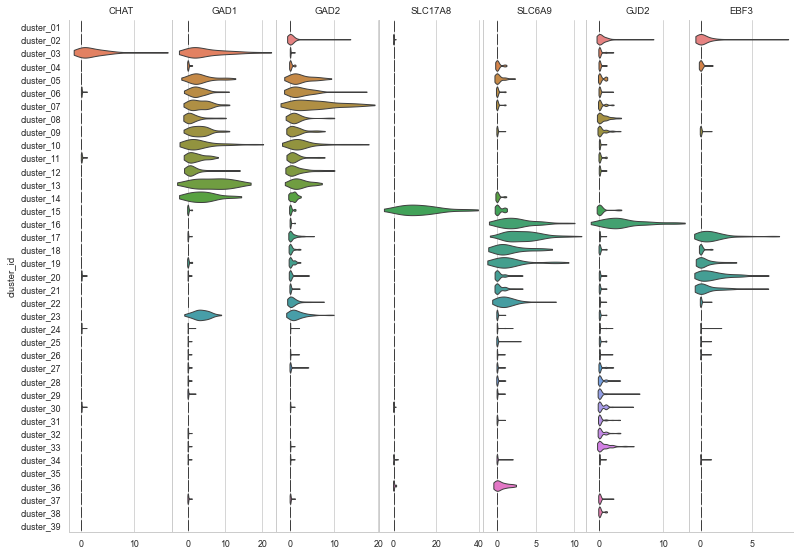

In [17]:
g = sns.FacetGrid(tidy_clusters, col='gene_symbol', size=8, aspect=0.2,
                  gridspec_kws=dict(hspace=0, wspace=0), sharex=False)
g.map(sns.violinplot, 'expression', 'cluster_id', orient='h', scale='width', 
      linewidth=1, order=clusters, palette='husl', inner=None, cut=True)
g.set(xlabel='')
g.set_titles('{col_name}')

if to_save:
    plt.savefig("figures/facetgrid/fig_5b-linear.png", transparent=True, bbox_inches="tight")

## Don't see bimodality .. try log2

In [18]:
tidy_clusters['log_expression'] = np.log2(tidy_clusters['expression'] + 1)

/home/harrisonized/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


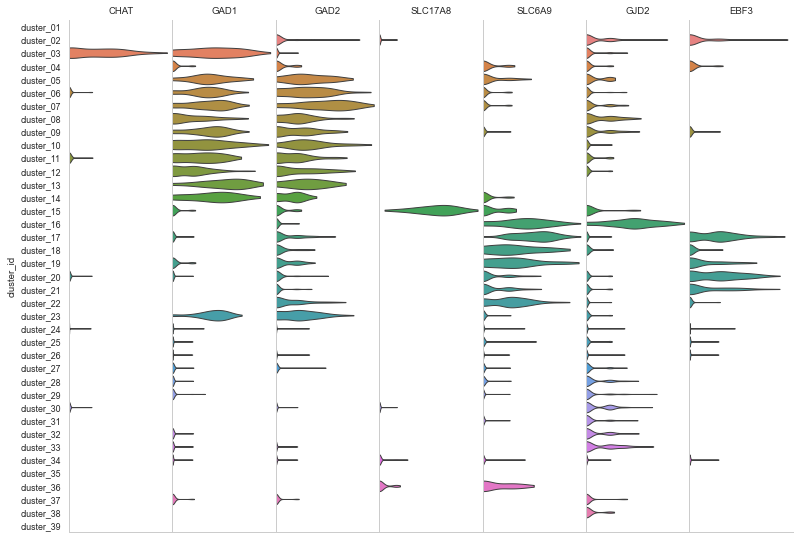

In [19]:
g = sns.FacetGrid(tidy_clusters, col='gene_symbol', size=8, aspect=0.2,
                  gridspec_kws=dict(hspace=0, wspace=0), sharex=False)
g.map(sns.violinplot, 'log_expression', 'cluster_id', orient='h', 
      scale='width', linewidth=1, order=clusters, palette='husl', 
      inner=None, cut=True)
g.set(xlabel='', xticks=[])
g.set_titles('{col_name}')
for ax in g.axes.flat:
    xmin, xmax = ax.get_xlim()
    ax.set(xlim=(0, xmax))
    
if to_save:
    plt.savefig("figures/facetgrid/fig_5b-log.png", transparent=True, bbox_inches="tight")

# 5c Genes

In [20]:
figure5c_genes = ['Gng7', 'Gbx2', 'Tpbg', 'Slitrk6', 'Maf', 'Tac2', 'Loxl2', 'Vip', 'Glra1',
                  'Igfbp5', 'Pdgfra', 'Slc35d3', 'Car3', 'Fgf1', 'Igf1', 'Col12a1', 'Ptgds',
                  'Ppp1r17', 'Cck', 'Pou3f3']  # 'Shisa9' not in index
figure5c_genes_upper = [gene.upper() for gene in figure5c_genes]
figure5c_expression = expression[figure5c_genes_upper]

/home/harrisonized/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


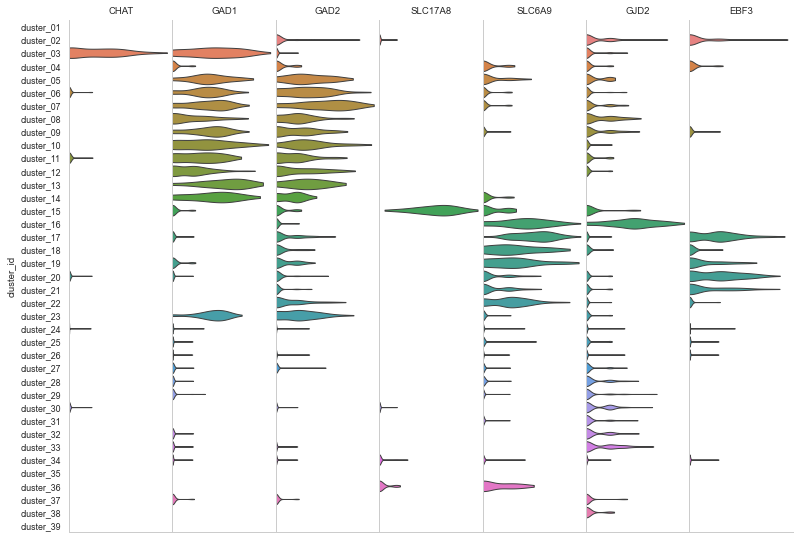

In [21]:
g = sns.FacetGrid(tidy_clusters, col='gene_symbol', size=8, aspect=0.2,
                  gridspec_kws=dict(hspace=0, wspace=0), sharex=False)
g.map(sns.violinplot, 'log_expression', 'cluster_id', orient='h', scale='width', 
      linewidth=1, order=clusters, palette='husl', inner=None, cut=True)
g.set(xlabel='', xticks=[])
g.set_titles('{col_name}')
for ax in g.axes.flat:
    xmin, xmax = ax.get_xlim()
    ax.set(xlim=(0, xmax))
    
if to_save:
    plt.savefig("figures/facetgrid/fig_5c.png", transparent=True, bbox_inches="tight")